In [1]:
import deepSI
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import optim, nn

### Load data silverbox data

see: https://sites.google.com/view/nonlinear-benchmark/

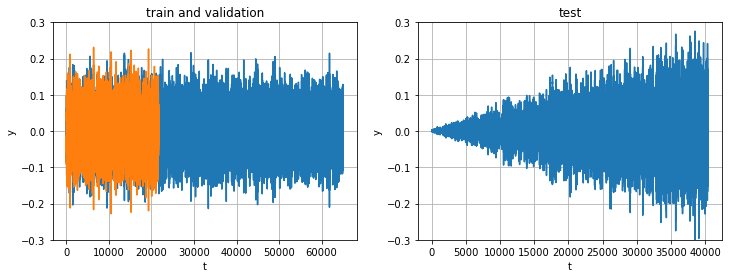

In [22]:
full = deepSI.datasets.Silverbox(split_data=False)
test = full.sdl[1][100:40575] #manual selection of test section
train, val = deepSI.datasets.Silverbox()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('train and validation')
train.plot()
val.plot()
plt.grid()
plt.ylim(-0.3,0.3)
plt.subplot(1,2,2)
plt.title('test')
plt.ylim(-0.3,0.3)
test.plot()
plt.grid()
plt.show()
# print('train =',train)
# print('test =',test)

## Fit/load encoder models

In [35]:
if False:
    sys2 = deepSI.fit_systems.System_encoder(nx=2,na=50,nb=50) #default is 2 hidden layers with 64 nodes
    #fitting can be and was stopped early with a keyboard interupt.
    sys2.fit(train,epochs=4000,batch_size=256,Loss_kwargs=dict(nf=100),sim_val=train[-30000:]) #not using validation set during training
    sys2.save_system('./Silver-data/silverbox_nx2_1-test')
    
    sys4 = deepSI.fit_systems.System_encoder(nx=4,na=50,nb=50) 
    sys4.fit(train,epochs=4000,batch_size=256,Loss_kwargs=dict(nf=100),sim_val=train[-30000:])
    sys4.save_system('./Silver-data/silverbox_nx4_1-test')
    
    sys8 = deepSI.fit_systems.System_encoder(nx=8,na=50,nb=50) 
    sys8.fit(train,epochs=4000,batch_size=256,Loss_kwargs=dict(nf=100),sim_val=train[-30000:])
    sys8.save_system('./Silver-data/silverbox_nx8_1-test')
else:
    sys2 = deepSI.load_system('./Silver-data/silverbox_nx2_1')
    sys4 = deepSI.load_system('./Silver-data/silverbox_nx4_1')
    sys8 = deepSI.load_system('./Silver-data/silverbox_nx8_1')

sys8.ny = sys4.ny = sys2.ny = None #this solves a backwards compatability problem
sys8.nu = sys4.nu = sys2.nu = None

### Calculate RMS and NRMS

In [28]:
train_sim2 = sys2.apply_experiment(train)
test_sim2 = sys2.apply_experiment(test)
val_sim2 = sys2.apply_experiment(val)

train_sim4 = sys4.apply_experiment(train)
test_sim4 = sys4.apply_experiment(test)
val_sim4 = sys4.apply_experiment(val)

train_sim8 = sys8.apply_experiment(train)
test_sim8 = sys8.apply_experiment(test)
val_sim8 = sys8.apply_experiment(val)

In [40]:
print('Main Results Silverbox:\n')
print(f'nx=2 NRMS train {train_sim2.NRMS(train):.5f}, RMS mV train {train_sim2.RMS(train)*1000:.7f}')
print(f'nx=2 NRMS val   {val_sim2.NRMS(val):.5f}, RMS mV val   {val_sim2.RMS(val)*1000:.7f}')
print(f'nx=2 NRMS test  {test_sim2.NRMS(test):.5f}, RMS mV test  {test_sim2.RMS(test)*1000:.7f}')
print(f'nx=2 NRMS test no extra  {test_sim2[:32000].NRMS(test[:32000]):.5f}, RMS {test_sim2[:32000].RMS(test[:32000])*1000:.7f}\n')
print(f'nx=4 NRMS train {train_sim4.NRMS(train):.5f}, RMS train {train_sim4.RMS(train)*1000:.7f}')
print(f'nx=4 NRMS val {val_sim4.NRMS(val):.5f},   RMS mV val {val_sim4.RMS(val)*1000:.7f}')
print(f'nx=4 NRMS test  {test_sim4.NRMS(test):.5f}, RMS  test {test_sim4.RMS(test)*1000:.7f}')
print(f'nx=4 NRMS test no extra  {test_sim4[:32000].NRMS(test[:32000]):.5f}, RMS {test_sim4[:32000].RMS(test[:32000])*1000:.7f}\n')
print(f'nx=8 NRMS train {train_sim8.NRMS(train):.5f}, RMS train {train_sim8.RMS(train)*1000:.7f}')
print(f'nx=8 NRMS val {val_sim8.NRMS(val):.5f}, RMS mV val {val_sim8.RMS(val)*1000:.7f}')
print(f'nx=8 NRMS test  {test_sim8.NRMS(test):.5f}, RMS  test {test_sim8.RMS(test)*1000:.7f}')
print(f'nx=8 NRMS test no extra  {test_sim8[:32000].NRMS(test[:32000]):.5f}, RMS {test_sim8[:32000].RMS(test[:32000])*1000:.7f}')

Main Results Silverbox:

nx=2 NRMS train 0.01841, RMS mV train 1.0043499
nx=2 NRMS val   0.01896, RMS mV val   1.0290172
nx=2 NRMS test  0.04479, RMS mV test  2.3937914
nx=2 NRMS test no extra  0.01937, RMS 0.8325616

nx=4 NRMS train 0.00620, RMS train 0.3381900
nx=4 NRMS val 0.00662,   RMS mV val 0.3593868
nx=4 NRMS test  0.02630, RMS  test 1.4059217
nx=4 NRMS test no extra  0.00735, RMS 0.3159153

nx=8 NRMS train 0.00398, RMS train 0.2169589
nx=8 NRMS val 0.00487, RMS mV val 0.2644608
nx=8 NRMS test  0.03744, RMS  test 2.0009862
nx=8 NRMS test no extra  0.00715, RMS 0.3070952


## Plot Residuals

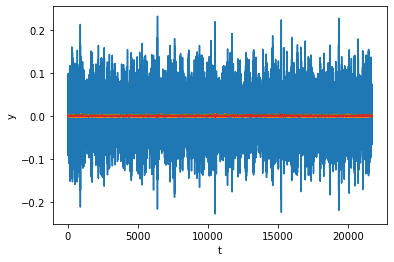

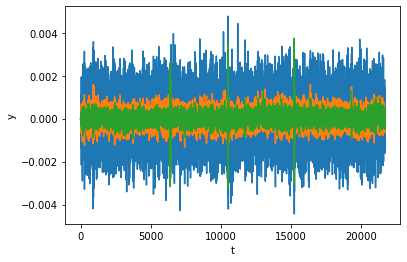

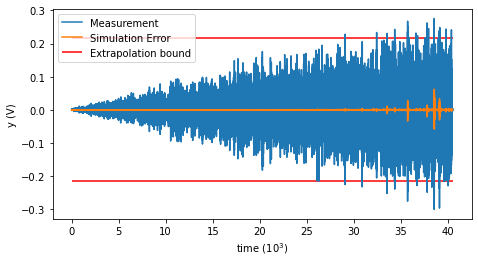

In [39]:
val.plot()
(val-val_sim2).plot()
(val-val_sim4).plot()
(val-val_sim8).plot(show=True)

(val-val_sim2).plot()
(val-val_sim4).plot()
(val-val_sim8).plot(show=True)

# plt.hlines(,0,40575-100,'r')
plt.figure(figsize=(9*0.75,5*0.75))
plt.plot(np.arange(len(test))/1000,test.y)
plt.hlines([np.max(train.y),np.min(train.y)],0,(40575-100)/1000,'r')  #add extrapolation lines
# (test-test_sim2).plot()
plt.plot(np.arange(len(test))/1000,(test-test_sim4).y)
plt.legend(['Measurement','Simulation Error', 'Extrapolation bound'])
plt.xlabel('time ($10^3$)')
plt.ylabel('y (V)')
plt.tight_layout()
plt.savefig('./Silver-figures/Silverbox_test_error.pdf')
plt.savefig('./Silver-figures/Silverbox_test_error.png',dpi=200)
plt.show()




### Training curves

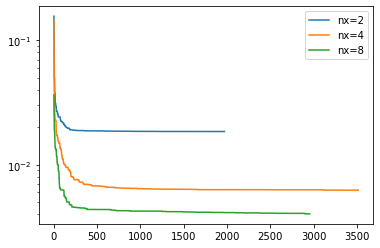

In [38]:
def min_a(A):
    lowest = float('inf')
    ar = []
    for Ai in A:
        if Ai<lowest:
            lowest = Ai
        ar.append(lowest)
    return np.array(ar)

plt.semilogy(min_a(sys2.Loss_val[1:]))
plt.semilogy(min_a(sys4.Loss_val[1:]))
plt.semilogy(min_a(sys8.Loss_val[2:]))
plt.legend(['nx=2','nx=4','nx=8'])
# plt.xlim(-1000,200000)
plt.show()